# Lab 5-1 다중 회귀(Multuple Regression)

## 라이브러리 import

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 한글 처리
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

Duplicate key in file WindowsPath('c:/Users/gik_k/anaconda3/Lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 263 ('font.family:  Malgun Gothic')
Duplicate key in file WindowsPath('c:/Users/gik_k/anaconda3/Lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 414 ('axes.unicode_minus: False')


## 데이터 준비

### CSV 데이터(학습 데이터) 로드

In [3]:
df = pd.read_csv('../data/perch.csv')
df.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [4]:
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

### target 데이터 로드

In [5]:
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

### 훈련 세트/테스트 세트 준비

In [6]:
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

## 특성 추가

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
poly = PolynomialFeatures()
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 10)


In [9]:
test_poly = poly.transform(test_input)

In [10]:
train_poly

array([[1.000000e+00, 1.960000e+01, 5.140000e+00, 3.040000e+00,
        3.841600e+02, 1.007440e+02, 5.958400e+01, 2.641960e+01,
        1.562560e+01, 9.241600e+00],
       [1.000000e+00, 2.200000e+01, 5.880000e+00, 3.520000e+00,
        4.840000e+02, 1.293600e+02, 7.744000e+01, 3.457440e+01,
        2.069760e+01, 1.239040e+01],
       [1.000000e+00, 1.870000e+01, 5.200000e+00, 3.120000e+00,
        3.496900e+02, 9.724000e+01, 5.834400e+01, 2.704000e+01,
        1.622400e+01, 9.734400e+00],
       [1.000000e+00, 1.740000e+01, 4.590000e+00, 2.940000e+00,
        3.027600e+02, 7.986600e+01, 5.115600e+01, 2.106810e+01,
        1.349460e+01, 8.643600e+00],
       [1.000000e+00, 3.600000e+01, 1.061000e+01, 6.740000e+00,
        1.296000e+03, 3.819600e+02, 2.426400e+02, 1.125721e+02,
        7.151140e+01, 4.542760e+01],
       [1.000000e+00, 2.500000e+01, 6.440000e+00, 3.680000e+00,
        6.250000e+02, 1.610000e+02, 9.200000e+01, 4.147360e+01,
        2.369920e+01, 1.354240e+01],
       [1.

## 모델 생성 후 학습

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [12]:
lr.fit(train_poly, train_target)

LinearRegression()

In [13]:
lr.score(train_poly, train_target)

0.9903183436982125

In [14]:
lr.score(test_poly, test_target)

0.9714559911594098

In [32]:
# 예측
X_test = np.linspace(0, 10, 99).reshape(-1, 3)
y_poly_pred = lr.predict(poly.transform(X_test))

In [50]:
print(perch_full.T[0].shape)
print(perch_weight.shape)

(56,)
(56,)


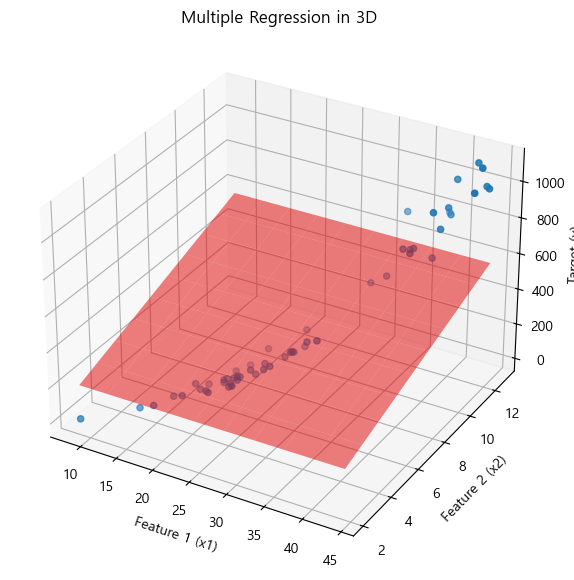

In [55]:
from mpl_toolkits.mplot3d import Axes3D

# 데이터 준비
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(perch_full.T[0], perch_full.T[1], perch_weight)
x1_range = np.linspace(min(perch_full.T[0]), max(perch_full.T[0]), 10)
x2_range = np.linspace(min(perch_full.T[1]), max(perch_full.T[1]), 10)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
y_grid = lr.intercept_ + lr.coef_[0] * x1_grid + lr.coef_[1] * x2_grid

ax.plot_surface(x1_grid, x2_grid, y_grid, color='red', alpha=0.5, label='Regression Plane')

# 라벨 설정
ax.set_xlabel('Feature 1 (x1)')
ax.set_ylabel('Feature 2 (x2)')
ax.set_zlabel('Target (y)')
plt.title('Multiple Regression in 3D')
plt.show()

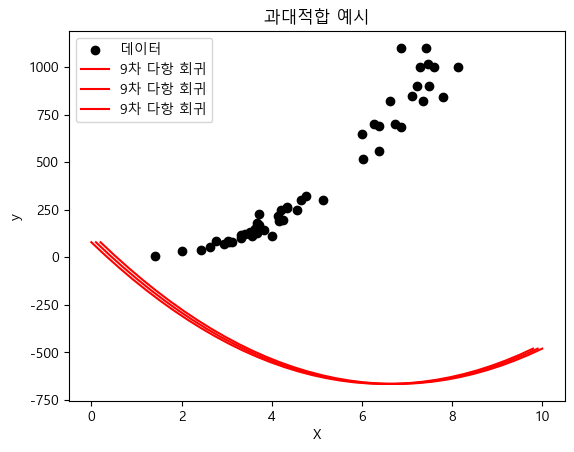

In [ ]:

plt.scatter(perch_full.T[2], perch_weight, color='black', label='데이터')
plt.plot(X_test, y_poly_pred, color='red', label='9차 다항 회귀')
plt.legend()
plt.title('과대적합 예시')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [31]:
np.linspace(0, 10, 100).reshape(-1, 10)

array([[ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
         0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091],
       [ 1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
         1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192],
       [ 2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
         2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293],
       [ 3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
         3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394],
       [ 4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
         4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495],
       [ 5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
         5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596],
       [ 6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
         6.56565657,  6.66666667,  6.76767677